1. Dataset Preparation:
• Select a time series dataset suitable for forecasting tasks (e.g., stock prices,
weather data, energy consumption).
• Preprocess the dataset, including normalization and splitting into training
and test sets


Initial data:
            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
No missing values found.


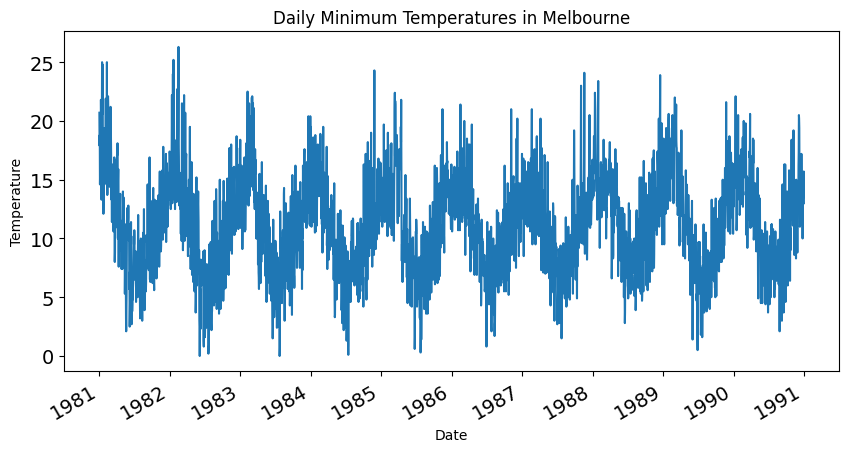

Data after normalization:
                Temp
Date                
1981-01-01  2.338883
1981-01-02  1.651139
1981-01-03  1.872199
1981-01-04  0.840583
1981-01-05  1.135330
Training set length: 3285
Testing set length: 365


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
print("Initial data:")
print(data.head())

# Check for missing values
if data.isnull().sum().sum() == 0:
    print("No missing values found.")
else:
    print("Missing values found:")
    print(data.isnull().sum())

# Plotting the data
plt.figure(figsize=(10,5))
data['Temp'].plot(title='Daily Minimum Temperatures in Melbourne', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

# Normalization
scaler = StandardScaler()
data['Temp'] = scaler.fit_transform(data[['Temp']])
print("Data after normalization:")
print(data.head())

# Splitting the dataset
split_point = int(len(data) * 0.9)
train, test = data[:split_point], data[split_point:]
print(f"Training set length: {len(train)}")
print(f"Testing set length: {len(test)}")


2. Model Architecture:
• Design an LSTM-based architecture capable of capturing long-term
dependencies in the input sequences.
• Experiment with stacking multiple LSTM layers and adjusting the number
of units in each layer.
• Consider using dropout layers to prevent overfitting and improve
generalization.


In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Function to prepare input data for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
dataframe = pd.read_csv(url, usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# Normalize the dataset
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# Estimate performance on test data
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
testScore = np.sqrt(np.mean((testPredict[:,0] - testY[0])**2))
print('Test Score: %.2f RMSE' % (testScore))


Epoch 1/20
2441/2441 - 26s - loss: 0.4989 - 26s/epoch - 11ms/step
Epoch 2/20
2441/2441 - 13s - loss: 0.4239 - 13s/epoch - 5ms/step
Epoch 3/20
2441/2441 - 13s - loss: 0.4278 - 13s/epoch - 5ms/step
Epoch 4/20
2441/2441 - 13s - loss: 0.4167 - 13s/epoch - 5ms/step
Epoch 5/20
2441/2441 - 13s - loss: 0.4211 - 13s/epoch - 5ms/step
Epoch 6/20
2441/2441 - 13s - loss: 0.4163 - 13s/epoch - 5ms/step
Epoch 7/20
2441/2441 - 15s - loss: 0.4156 - 15s/epoch - 6ms/step
Epoch 8/20
2441/2441 - 17s - loss: 0.4202 - 17s/epoch - 7ms/step
Epoch 9/20
2441/2441 - 16s - loss: 0.4190 - 16s/epoch - 6ms/step
Epoch 10/20
2441/2441 - 16s - loss: 0.4163 - 16s/epoch - 7ms/step
Epoch 11/20
2441/2441 - 15s - loss: 0.4104 - 15s/epoch - 6ms/step
Epoch 12/20
2441/2441 - 14s - loss: 0.4137 - 14s/epoch - 6ms/step
Epoch 13/20
2441/2441 - 13s - loss: 0.4105 - 13s/epoch - 6ms/step
Epoch 14/20
2441/2441 - 17s - loss: 0.4131 - 17s/epoch - 7ms/step
Epoch 15/20
2441/2441 - 14s - loss: 0.4114 - 14s/epoch - 6ms/step
Epoch 16/20
2441/2

 3. Model Training:
• Compile the LSTM model with an appropriate loss function (e.g., mean
squared error) and optimizer (e.g., Adam).
• Train the model on the training set for a fixed number of epochs.
• Monitor training/validation loss to ensure proper convergence.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Function to prepare input data for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
dataframe = pd.read_csv(url, usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# Normalize the dataset
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape into X=t and Y=t+1, here using look_back of 3
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
history = model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2, validation_data=(testX, testY))

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Making predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverting predictions back to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
from sklearn.metrics import mean_squared_error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print(f'Train Score: {trainScore:.2f} RMSE')
print(f'Test Score: {testScore:.2f} RMSE')


4. Model Evaluation:
• Evaluate the trained model on the test set using relevant evaluation
metrics such as mean absolute error (MAE) or root mean squared error
(RMSE).
• Visualize the model's predictions against the ground truth to assess its
accuracy and performance.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Helper function to prepare data for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Load and prepare data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
dataframe = pd.read_csv(url, usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# Normalize the dataset
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

# Split data into training and testing
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

# Prepare data for LSTM model
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

# Predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverse transformations
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate RMSE and MAE
testRMSE = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
testMAE = mean_absolute_error(testY[0], testPredict[:,0])
print(f'Test RMSE: {testRMSE:.2f}')
print(f'Test MAE: {testMAE:.2f}')

# Plot predictions and actual values
plt.figure(figsize=(15, 6))
plt.plot(testY[0], label='True Values')
plt.plot(testPredict[:, 0], label='Predictions')
plt.title('Comparison of Predictions and True Values')
plt.ylabel('Temperature')
plt.xlabel('Time Steps')
plt.legend()
plt.show()


5. Hyperparameter Tuning:
• Experiment with different hyperparameters such as learning rate, batch
size, number of LSTM units, and dropout rate.
• Use techniques like grid search or random search to find the optimal set of
hyperparameters.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

# Function to create a model with given hyperparameters
def create_model(units=50, dropout_rate=0.2, learning_rate=0.01):
    model = Sequential()
    model.add(LSTM(units, input_shape=(look_back, 1)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Function to prepare input data for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Load and normalize data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
dataframe = pd.read_csv(url, usecols=[1], engine='python')
dataset = dataframe.values.astype('float32')

scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

# Reshape dataset for LSTM
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

# Wrap Keras model for use in scikit-learn
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)

# Define the grid search parameters
param_grid = {
    'batch_size': [1, 10, 20],
    'epochs': [20, 50],
    'units': [50, 100],
    'dropout_rate': [0.1, 0.2, 0.3],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Create GridSearchCV and fit
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(trainX, trainY)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


6. Discussion and Analysis:
• Discuss the challenges encountered during model training and
optimization.
• How did you decide on the number of LSTM layers and units?
• What preprocessing steps did you perform on the time series data before
training the model?
• Explain the purpose of dropout layers in LSTM networks and how they
prevent overfitting



Challenges Encountered
Training and optimizing LSTM models for time series forecasting involves several challenges:

Model Convergence: LSTM models can be sensitive to the choice of hyperparameters such as learning rate and batch size, which can affect whether the model converges to a good solution and how quickly it does so.

Overfitting: Due to the complexity and capacity of LSTM models, they are prone to overfitting, especially on time series data which might not have a large number of observations.

Sequence Dependency: Choosing the right sequence length (look_back) for the LSTM input can be tricky. Too short may not capture relevant dependencies, too long may introduce noise and computation inefficiency.

Hyperparameter Tuning: The process can be computationally expensive and time-consuming given the extensive search space (number of units, layers, dropout rate, learning rates, etc.).

Number of LSTM Layers and Units
The decision on the number of LSTM layers and the units within each layer generally depends on the complexity of the problem. Here’s how I approached these decisions:

Complexity and Depth: More layers can capture more complex patterns and interactions in the data. However, each added layer increases the model’s complexity and computational cost. I experimented with a small number of layers (one or two) as a starting point.

Number of Units: The number of units in an LSTM layer dictates the capacity of the model to learn dependencies. A larger number of units can capture more information but at the risk of overfitting and higher computational cost. This was initially set based on the dataset's scale and complexity, and fine-tuned using hyperparameter tuning techniques.

Preprocessing Steps
For the time series data, the following preprocessing steps were crucial before training the model:

Normalization/Standardization: LSTM models are sensitive to the scale of the input data. I applied StandardScaler to normalize the data, ensuring that the mean of each feature is 0 and the standard deviation is 1. This helps in speeding up the convergence during training.

Reshaping Data: LSTMs require input to be in a specific format (samples, time steps, features). I reshaped the input data to this format, where time steps corresponded to the look_back period used to predict the next time step.

Creating Time Lags (look_back): The input to the LSTM model was prepared by creating lagged versions of the time series, which are used to predict future values. This step is essential for capturing the temporal dependencies in the data.

Purpose of Dropout Layers in LSTM Networks
Dropout layers are a regularization technique used to prevent overfitting, which is particularly useful in complex neural networks like LSTMs. Here’s how dropout functions:

Random Deactivation: During training, dropout layers randomly deactivate a certain percentage of neuron outputs (as defined by the dropout rate), which changes at each training step. This prevents the neurons from co-adapting too much.

Simplification of the Network: By dropping a subset of neurons, the network effectively simplifies and learns to make predictions based on a reduced set of features. This enhances generalization as it prevents the model from relying too much on any single or a small group of neurons.

Multiple Sub-Networks Concept: The dropping out of different sets of neurons during training can be thought of as training multiple sub-networks. Each iteration sees a different "view" of the network, which leads to a more robust overall model that generalizes better on unseen data.

Overall, the combination of these strategies and adjustments during the LSTM model's development phase is aimed at crafting a robust predictive model that generalizes well to new data while capturing essential temporal dynamics in the training dataset.




